<a href="https://colab.research.google.com/github/MrDevCop/ML-project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAKING CUSTOMER PROFILE OF AN INSURANCE COMPANY**

This project involves using R programming language on python runtime in google colab by using *rmagic*. The reason for not using R runtime is because there is not an authentic way to mount google drive on the colab with R runtime which poses an issue of unable to use project specific datasets upoaded on google drive. 

In [2]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Mounting google drive using python 

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# **DATA EXPLAINATION**

The dataset belongs to an insurance company trying to figure out the kind of customers interested in buying their new insursnce policy 'CARAVAN Insurance Policy'. The dataset is compiled by Dutch Data Mining Compnay Sentinal Machine Research. The dataset consists of 86 variables where 1-43 are socio-demographic information about the customers and 43-86 shows ownership of other insurance policies held by customers. Total observations are 9822 where 5822 (almost 60%) will be used for training and 4000 (almost 41%) will be used for testing. Machine learning algorithm, Decision Trees will be applied on the dataset to determine the kind of customers interested in buying the 'CARAVAN' insurance policy. Other techniques like Random Forests, boosted trees, Bagging Trees are no doubt more robust techniques but the objective of this project calls for decision trees as I have to build a 'customer profile' based on prior data to determine who will buy the said insurance policy. The variable names are keywords corresponding to the actual value that column holds. For exmaple the first column 'MOSTYPE' shows the customer subtype. The values of the column are numeric which encodes to the customer subtypes given at the end of this explaination. Hence you have to look at the data dictionary that I have created and listed below:


---


1 MOSTYPE Customer Subtype see L0                  

2 MAANTHUI Number of houses 1 – 10 

3 MGEMOMV Avg size household 1 – 6 

4 MGEMLEEF Avg age see L1 

5 MOSHOOFD Customer main type see L2 

6 MGODRK Roman catholic see L3 

7 MGODPR Protestant ... 

8 MGODOV Other religion 

9 MGODGE No religion 

10 MRELGE Married 

11 MRELSA Living together 

12 MRELOV Other relation 

13 MFALLEEN Singles 

14 MFGEKIND Household without children 

15 MFWEKIND Household with children 

16 MOPLHOOG High level education 

17 MOPLMIDD Medium level education 

18 MOPLLAAG Lower level education 

19 MBERHOOG High status 

20 MBERZELF Entrepreneur 

21 MBERBOER Farmer 

22 MBERMIDD Middle management 

23 MBERARBG Skilled labourers 

24 MBERARBO Unskilled labourers 

25 MSKA Social class A 

26 MSKB1 Social class B1 

27 MSKB2 Social class B2 

28 MSKC Social class C 

29 MSKD Social class D 

30 MHHUUR Rented house 

31 MHKOOP Home owners 

32 MAUT1 1 car 

33 MAUT2 2 cars 

34 MAUT0 No car 

35 MZFONDS National Health Service 

36 MZPART Private health insurance 

37 MINKM30 Income < 30.000 

38 MINK3045 Income 30-45.000 

39 MINK4575 Income 45-75.000 

40 MINK7512 Income 75-122.000 

41 MINK123M Income >123.000 

42 MINKGEM Average income 

43 MKOOPKLA Purchasing power class 

44 PWAPART Contribution private third party insurance see L4 

45 PWABEDR Contribution third party insurance (firms) ... 

46 PWALAND Contribution third party insurane (agriculture) 

47 PPERSAUT Contribution car policies 

48 PBESAUT Contribution delivery van policies 

49 PMOTSCO Contribution motorcycle/scooter policies 

50 PVRAAUT Contribution lorry policies 

51 PAANHANG Contribution trailer policies 

52 PTRACTOR Contribution tractor policies 

53 PWERKT Contribution agricultural machines policies 

54 PBROM Contribution moped policies 

55 PLEVEN Contribution life insurances 

56 PPERSONG Contribution private accident insurance policies 

57 PGEZONG Contribution family accidents insurance policies 

58 PWAOREG Contribution disability insurance policies 

59 PBRAND Contribution fire policies 

60 PZEILPL Contribution surfboard policies 

61 PPLEZIER Contribution boat policies 

62 PFIETS Contribution bicycle policies 

63 PINBOED Contribution property insurance policies 

64 PBYSTAND Contribution social security insurance policies 

65 AWAPART Number of private third party insurance 1 - 12 

66 AWABEDR Number of third party insurance (firms) ... 

67 AWALAND Number of third party insurane (agriculture) 

68 APERSAUT Number of car policies 

69 ABESAUT Number of delivery van policies 

70 AMOTSCO Number of motorcycle/scooter policies 

71 AVRAAUT Number of lorry policies 

72 AAANHANG Number of trailer policies 

73 ATRACTOR Number of tractor policies 

74 AWERKT Number of agricultural machines policies 

75 ABROM Number of moped policies 

76 ALEVEN Number of life insurances 

77 APERSONG Number of private accident insurance policies 

78 AGEZONG Number of family accidents insurance policies 

79 AWAOREG Number of disability insurance policies 

80 ABRAND Number of fire policies 

81 AZEILPL Number of surfboard policies 

82 APLEZIER Number of boat policies 

83 AFIETS Number of bicycle policies 

84 AINBOED Number of property insurance policies 

85 ABYSTAND Number of social security insurance policies 

86 CARAVAN Number of mobile home policies 0 - 1


---

The averaged variables having keywords L0, L1, L2, L3, L4 are listed below:


---

L0

1 High Income, expensive child 

2  Very Important Provincials 

3  High status seniors 

4  Affluent senior apartments 

5  Mixed seniors 

6  Career and childcare 

7  Dinki's (double income no kids) 

8  Middle class families 

9  Modern, complete families 

10  Stable family 

11  Family starters 

12  Affluent young families 

13  Young all american family 

14  Junior cosmopolitan 

15  Senior cosmopolitans 

16  Students in apartments 

17  Fresh masters in the city 

18  Single youth 

19  Suburban youth 

20  Etnically diverse 

21  Young urban have-nots 

22 Mixed apartment dwellers 

23  Young and rising 

24  Young, low educated 

25  Young seniors in the city 

26  Own home elderly 

27  Seniors in apartments 

28  Residential elderly 

29  Porchless seniors: no front yard 

30  Religious elderly singles 

31  Low income catholics 

32  Mixed seniors 

33  Lower class large families 

34  Large family, employed child 

35  Village families 

36  Couples with teens 'Married with children' 

37  Mixed small town dwellers 

38  Traditional families 

39  Large religous families 

40  Large family farms 

41  Mixed rurals


---
L1

1   20-30 years

2   30-40 years

3   40-50 years

4   50-60 years

5   60-70 years

6   70-80 years


---

L2

1    Successful hedonists

2    Driven Growers

3    Average Family

4    Career Loners

5    Living well

6    Cruising Seniors

7    Retired and Religeous

8    Family with grown ups

9    Conservative families

10   Farmers


---

L3

0 0%

1 1 - 10%

2 11 - 23%

3 24 - 36%

4 37 - 49%

5 50 - 62%

6 63 - 75%

7 76 - 88%

8 89 - 99%

9 100%



---
L4

0 f 0

1 f 1 – 49

2 f 50 – 99

3 f 100 – 199

4 f 200 – 499

5 f 500 – 999

6 f 1000 – 4999

7 f 5000 – 9999

8 f 10.000 - 19.999

9 f 20.000 



Installing and Loading all the required libraries

In [ ]:
%%R
install.packages("rpart")
install.packages("rattle")
install.packages("caret")
install.packages("rpart.plot")
install.packages("RColorBrewer")
install.packages("crossval")
install.packages("ROSE")
install.packages("gplots")
install.packages("ModelMetrics")

library(rpart)
library(caret)
library(rattle)
library(rpart.plot)
library(RColorBrewer)
library(crossval)
library(gplots)
library(ModelMetrics)
library(ROSE)

Loading the datasets uploaded in the ML project folder by using the link of each file

In [214]:
%%R
train_data<- read.csv('/content/drive/MyDrive/ML Project/TrainingDatas.csv')
test_data<- read.csv('/content/drive/MyDrive/ML Project/TD.csv')
target<- read.csv('/content/drive/MyDrive/ML Project/Target.csv')
target<-as.vector(target$CARAVAN)

Setting a seed to reproduce results

In [ ]:
%%R
set.seed(123)

# **EXPLORATORY ANALYSIS**

As the dataset is divided into two parts; testing and training sets, there is a need to join them together for correct analysis

In [7]:
%%R
full_data<- rbind(train_data,test_data)

In [ ]:
%%R
table(full_data$CARAVAN)


   0    1 
9236  586 


The below piechart shows the number of customers who purchased (Yes) the Caravan policy which is 586 and who have not purchased (NO) the Caravan policy which is 9236

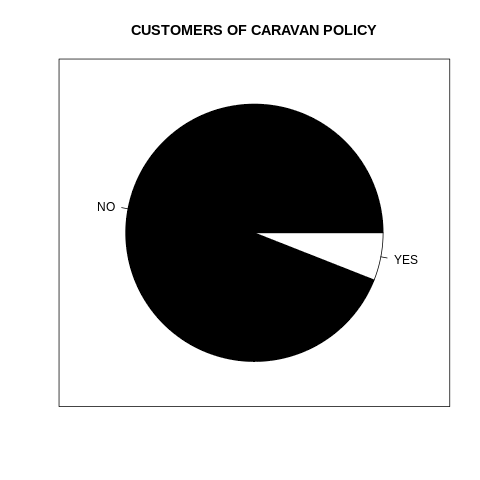

In [ ]:
%%R
colors = c("black","white")
pie (table(full_data$CARAVAN), c("NO","YES"), main = "CUSTOMERS OF CARAVAN POLICY", col=colors)
box()

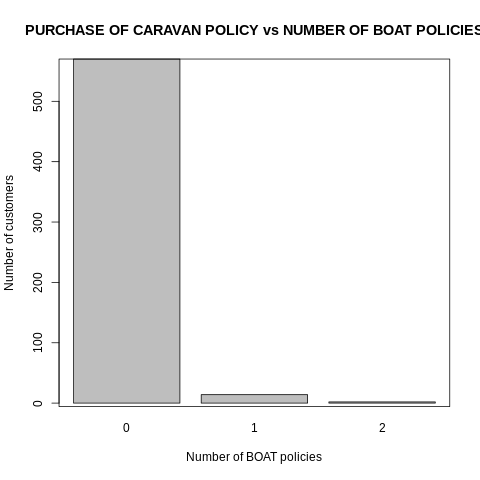

In [ ]:
%%R
barplot(table(full_data$APLEZIER[full_data$CARAVAN=='1']),border="black",col = "grey",main = "PURCHASE OF CARAVAN POLICY vs NUMBER OF BOAT POLICIES",xlab = "Number of BOAT policies",ylab = "Number of customers")
box()

The above barplot shows that the Customers who have not purchased the boat policy (value 0) are more likely to purchase the Caravan policy

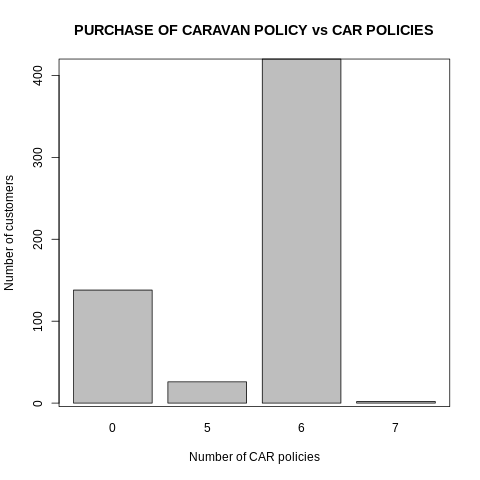

In [ ]:
%%R
barplot(table(full_data$PPERSAUT[full_data$CARAVAN=='1']),border="black",col = "grey",main = "PURCHASE OF CARAVAN POLICY vs CAR POLICIES",xlab = "Number of CAR policies",ylab = "Number of customers")
box()

In the above bargraph, We come to know that the Customers having 6 car policies are more likely to purchase the Caravan policy

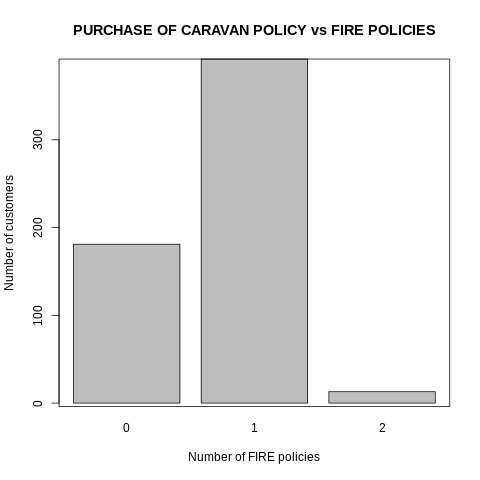

In [ ]:
%%R
barplot(table(full_data$ABRAND[full_data$CARAVAN=='1']),border="black",col = "grey",main = "PURCHASE OF CARAVAN POLICY vs FIRE POLICIES",xlab = "Number of FIRE policies",ylab = "Number of customers")
box()

In the above bargraph, We come to know that the Customers who purchase only one fire policy are more likely to purchase the Caravan policy

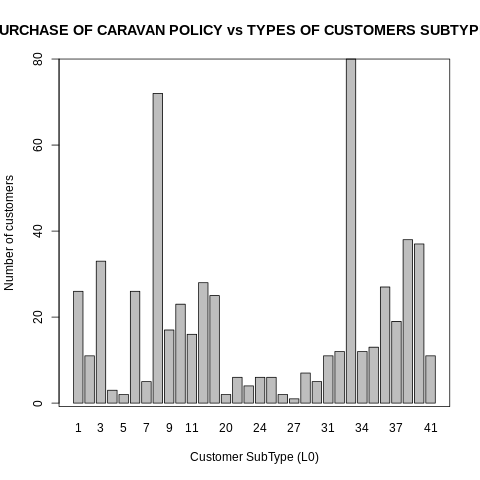

In [35]:
%%R
barplot(table(full_data$MOSTYPE[full_data$CARAVAN=='1']),border="black",col = "grey",main = "PURCHASE OF CARAVAN POLICY vs TYPES OF CUSTOMERS SUBTYPE (L0)",xlab = "Customer SubType (L0)",ylab = "Number of customers")
box()

In the above barplot, Customers of various subtype of about 41 labels are taken (see L0 for reference). Customers belonging to subtype 8 (Middle class families) & subtype 33 (lower class with large families) are more likely to purchase the Caravan policy

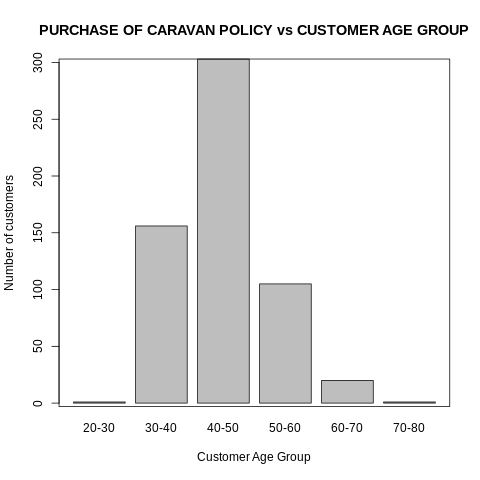

In [40]:
%%R
tab<-table(full_data$MGEMLEEF[full_data$CARAVAN=='1'])
names(tab)<-c("20-30", "30-40","40-50","50-60","60-70","70-80")

barplot(tab ,border="black",col = "grey",main = "PURCHASE OF CARAVAN POLICY vs CUSTOMER AGE GROUP",xlab = "Customer Age Group",ylab = "Number of customers")
box()

In the above barplot, customers of various age groups (see L1 for reference) are taken and it is plotted against the customers who have bought caravan policy. The customers belonging to age group of 40-50 are more likely to purchase the caravan policy


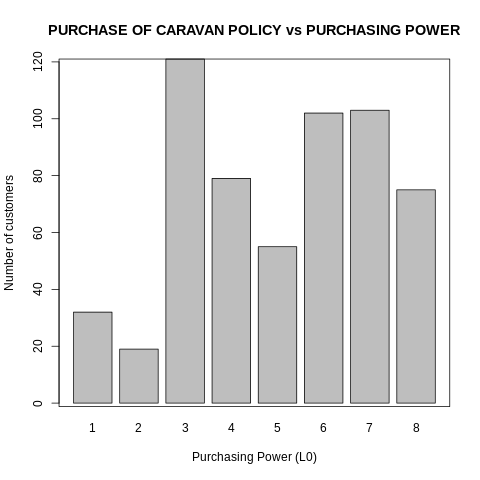

In [44]:
%%R
barplot(table(full_data$MKOOPKLA[full_data$CARAVAN=='1']),col="grey",main = "PURCHASE OF CARAVAN POLICY vs PURCHASING POWER",xlab = "Purchasing Power (L0)",ylab = "Number of customers")
box()

In the above barplot, We come to know that the Customers who are of High status seniors (3) are more likely to purchase the Caravan policy, with "Dinki's" (double income no kids (7)) and "Career and childcare" class (6) coming in at second and third place respectively (see L0 for reference)

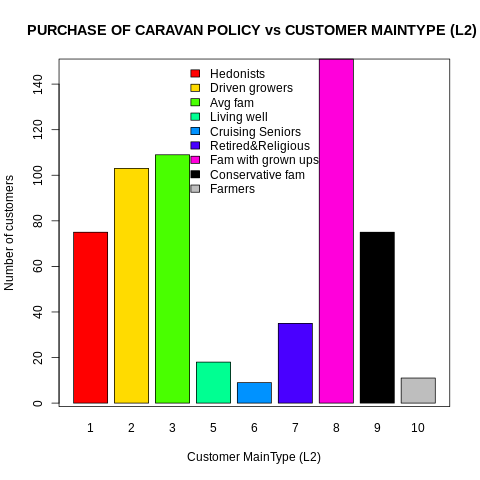

In [43]:
%%R
tab_<-table(full_data$MOSHOOFD[full_data$CARAVAN=='1'])
names(tab_)<- c("Hedonists", "Driven growers", "Avg fam", "Living well","Cruising Seniors","Retired&Religious","Fam with grown ups","Conservative fam","Farmers")
barplot(args.legend = list(x ='topright', bty='n', inset=c(0.32,0)),legend.text = c("Hedonists", "Driven growers", "Avg fam", "Living well","Cruising Seniors","Retired&Religious","Fam with grown ups","Conservative fam","Farmers"), table(full_data$MOSHOOFD[full_data$CARAVAN=='1']),col=c(rainbow(7),"black","grey","white"),main = "PURCHASE OF CARAVAN POLICY vs CUSTOMER MAINTYPE (L2) ",xlab = "Customer MainType (L2)",ylab = "Number of customers")
box()

In the above barplot Customers of various maintype of about 10 labels are taken. Customers belonging to maintype 8 (Family with grown ups) & maintype 3(Average family) are more likely to purchase the Caravan policy. Moreover it is seen that (Driven growers) maintype 2, are also interested in buying the said insurance policy (see L2 for reference)

# **DATA PRE-PROCESSING**

Checking for multi-collinearity and removing unwanted variables

In [30]:
%%R
corr_mat<-cor(full_data)
temp<- which(abs(corr_mat) > 0.80, arr.ind=TRUE)
corr_df<-as.data.frame(temp)
col_corr_df<-corr_df$col
var<-colnames(full_data[col_corr_df])
new_corr_mat<-cbind(temp,var)
new_corr_df<-as.data.frame(new_corr_mat)
corr_filter<-new_corr_df$row == new_corr_df$col
final_corr_df<-new_corr_df[!corr_filter,]
names(final_corr_df)<-c("Variable_1_Index", "Variable_2_Index", "Variable 2")
final_corr_df

           Variable_1_Index Variable_2_Index Variable 2
MOSHOOFD                  5                1  MOSTYPE.1
MOSTYPE.1                 1                5   MOSHOOFD
MRELOV                   12               10   MRELGE.1
MRELGE.1                 10               12     MRELOV
MHKOOP                   31               30   MHHUUR.1
MHHUUR.1                 30               31     MHKOOP
MZPART                   36               35  MZFONDS.1
MZFONDS.1                35               36     MZPART
AWAPART                  65               44  PWAPART.1
AWABEDR                  66               45  PWABEDR.1
AWALAND                  67               46  PWALAND.1
APERSAUT                 68               47 PPERSAUT.1
ABESAUT                  69               48  PBESAUT.1
AMOTSCO                  70               49  PMOTSCO.1
AVRAAUT                  71               50  PVRAAUT.1
AAANHANG                 72               51 PAANHANG.1
ATRACTOR                 73               52 PTR

The output of *final_corr_df* is a dataframe shwoing all persistent correlations between variables of the dataset. Each variable name is written against its index and the name of the variable it is most closely related with. For example; in first row the first variable MOSHOOFD is collinear with MOSTYPE, and so on. 

In [105]:
%%R
rm_var<-c(5,10,30,35,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85)
new_train_data<-train_data[, -rm_var]
#new_test_data<-test_data[,-rm_var]
ncol(new_train_data)
#ncol(new_test_data)

[1] 61


Hence the number of features have been reduced to 61

Randomizing the data

In [191]:
%%R
random<-sample(1:nrow(new_train_data))
new_train_data<- new_train_data[random,]

# **MODEL**

Fitting the model using *rpart*

In [107]:
%%R
model<- rpart(formula=CARAVAN ~ .,data= new_train_data)
model

n= 5822 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 5822 327.198900 0.05977327  
   2) PPERSAUT< 5.5 3459  83.861810 0.02486268 *
   3) PPERSAUT>=5.5 2363 232.950500 0.11087600  
     6) MOSTYPE>=8.5 1899 153.137400 0.08846761  
      12) PPLEZIER< 0.5 1882 145.567000 0.08448459 *
      13) PPLEZIER>=0.5 17   4.235294 0.52941180 *
     7) MOSTYPE< 8.5 464  74.956900 0.20258620 *


Removing the variable of interest from the testing dataset

In [192]:
%%R
new_test_data<-new_test_data[,-86]

Pruning the model before getting predictions

In [160]:
%%R
print(model$cptable)

cp<-model$cptable[which.min(model$cptable[,"xerror"]),"CP"]

model_cp<-prune(tree =model,cp=cp)

          CP nsplit rel error    xerror       xstd
1 0.03174401      0 1.0000000 1.0005397 0.04869949
2 0.01484158      1 0.9682560 0.9695565 0.04585877
3 0.01019318      2 0.9534144 0.9599647 0.04507715
4 0.01000000      3 0.9432212 0.9509731 0.04481964


Generating Predictions

In [209]:
%%R
target<-read.csv('/content/drive/MyDrive/ML Project/Target.csv')
target<-as.vector(target$CARAVAN)
pred<-predict(object = model_cp, new_test_data)

pred<-as.vector(pred)
for (i in 1: 4000){
  if (pred[i]<0.2){
   pred[i]=0
  }   
  else{
    pred[i]=1
  }
}



Confusion Matrix

In [210]:
%%R
actual<-target
predicted<-pred
cm<-confusionMatrix(actual, predicted) 
print(cm)

     [,1] [,2]
[1,] 3479  191
[2,]  283   47


As shown in above confusion matrix the model was successful in predicting the customer choice of either purchasing or not purchasing CARAVAN insurance policy by 88.1%. The misclassification error turns out to be 11%. 

RMSE

In [211]:
%%R
rms<-rmse(target,pred)
print(rms)

[1] 0.3442383


Comparision 

In [212]:
%%R
prediction <- factor(as.factor(pred), c(0, 1), labels = c("Not purchased", "Purchased"))
target <- factor(as.factor(target), c(0, 1), labels = c("Not purchased", "Purchased"))
tb<-table(prediction)
print(tb)
tb_t<-table(target)
print(tb_t)

prediction
Not purchased     Purchased 
         3670           330 
target
Not purchased     Purchased 
         3762           238 


As seen from above analysis, the model misclassified 92 observations of 'Not purchased' as 'Purchased'. 

# **ANALYSIS**

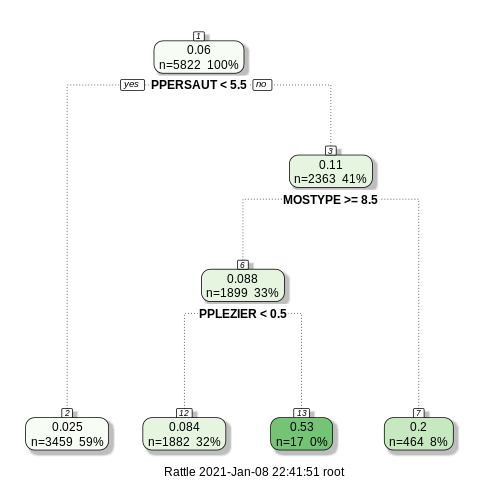

In [213]:
%%R
fancyRpartPlot(model_cp)

From the above decision tree, few customers profiles can be made:

1- Contribution of car policies-PPERSAUT is less than 5.5, which means that customers having atleast 5 or atmost 6 car policies will be interested in buying caravan insurance policy. It can also be seen that 59% of customers dont have car policies hence are not a part of probable customer base. Because its highly ulikely with the probabbility of 0.025 that customers having less than 5 car policies will be interested in buying the said policy.

2- Furthermore it can be seen that customers who dont have boat policies (PPLEZIER less than 0.5) and belong to either middle class or modern families are likely to buy the insurance policies. This result can also bee endorsed by looking at the graph between number of caravan insurance policies and boat policies. Moreover customers with one or more than one boat policies are very highly likely to buy the insurance policy with the prob of 0.53. The customer base who have boat policies and intersted in buying the caravan policy are in a minority (17). But they are very likely to be the potential buyers for the company. 

3- Customers who are high status seniors, or have a high income are also very likely to buy the insurance policy with the prob of 0.2. But again these kind of customers are in less number (8%), so its advisable for the company to target customers who belong to the middle class and have no fire policy. Because they make the larger chunk of their customer base (32%) who will be interested in purchasing the policy with right approach and markeing stratigies.   

